<a href="https://colab.research.google.com/github/ziatdinovmax/atomai/blob/master/atomai_atomstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate analysis of ferroic distortions with *atomstat* module

Prepared by Maxim Ziatdinov

E-mail: maxim.ziatdinov@ai4microscopy.com

In this notebook we show how the atomic coordinates derived via a pre-trained neural network from the atom-resolved image can be used to explore the extant atomic displacement patterns in the material and build the collection of the building blocks for the distorted lattice. For more details see our paper in Appl. Phys. Lett. 115, 052902 (2019).

## Install AtomAI

Installation:

In [ ]:
!pip install atomai

     |████████████████████████████████| 112kB 6.0MB/s 
     |████████████████████████████████| 194kB 18.3MB/s 
     |████████████████████████████████| 870kB 26.2MB/s 
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174964 sha256=eeeb152ae6757fc3b1633b727533ed6881e07af5722f8c5e460cb86e38b74c58
  Stored in directory: /root/.cache/pip/wheels/fb/28/5d/95e69a718b35dd00169889b0139a692f6c265d399cab3aa097
Successfully built mendeleev


Import modules:

In [ ]:
import atomai as aoi
import numpy as np

Download the trained weights and test image:

In [ ]:
download_link_model = 'https://drive.google.com/uc?id=18hXcw0tZ_fALtI2Fir1fHirAt27tRqj4'
download_link_img = 'https://drive.google.com/uc?id=1peHF1lvpOKlOSMjREB2aSscyolrQQhoh'
!gdown -q $download_link_model -O 'simple_model.tar'
!gdown -q $download_link_img -O 'test_img.npy'

## Ferroic blocks analysis with atomstat

First we need to load the trained model. To do this, we specify a path to file with the trained weights and model specifics. We are going to use the weights trained in the [atomai-atomnet notebook](https://colab.research.google.com/github/ziatdinovmax/atomai/blob/master/examples/notebooks/atomai_atomnet.ipynb#scrollTo=XGxhL7ha1Y3R).

In [ ]:
# Path to file with trained weights
model_dict_path = '/content/simple_model.tar'
# load the weights into the model skeleton
model = aoi.load_model(model_dict_path)

Make a prediction with the loaded model:

In [ ]:
# Load experimental data
expdata = np.load('test_img.npy')
# Get NN output with coordinates and classes
nn_output, coordinates = model.predict(expdata)

Batch 1/1
1 image was decoded in approximately 3.1576 seconds


Here we are going to use *atomstat* module to get local image descriptors first (i.e. stack of subimages around one of the atom types) and then perform different types of statistical analysis on them. This is similar to what we did in *Applied Physics Letters 115, 052902 (2019)* (although here we are going to use a different model and the image was downsized by a factor of 2 to allow faster inference, without using a GPU).

Get local descriptors, which are subimages centered on one of the sublattices:

In [ ]:
imstack = aoi.stat.imlocal(nn_output, coordinates, window_size=32, coord_class=1)

Compute PCA scree plot to estimate the number of components/sources for the multivariate analysis below:

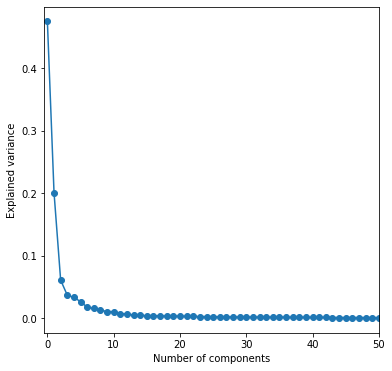

In [ ]:
imstack.pca_scree_plot(plot_results=True);

Do PCA analysis and plot results:

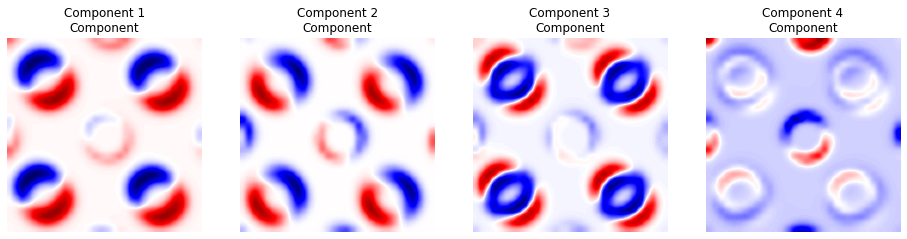

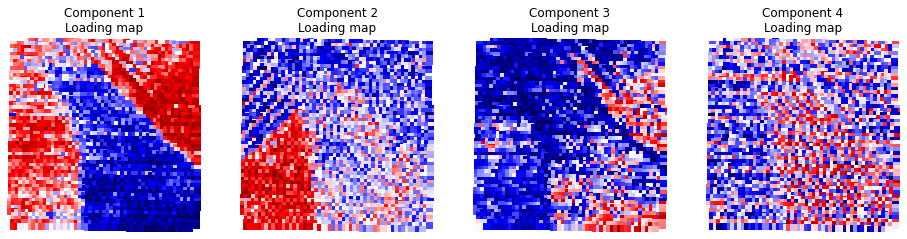

In [ ]:
pca_results = imstack.imblock_pca(4, plot_results=True)

Do ICA analysis and plot results:

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


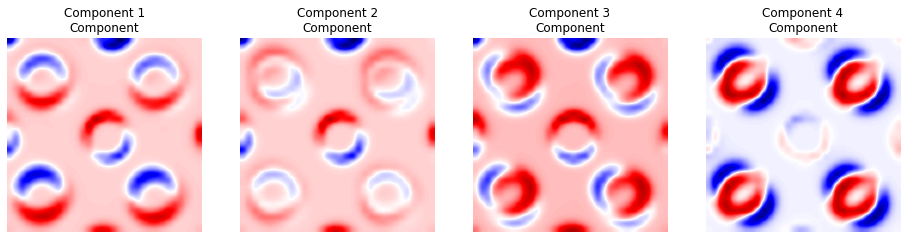

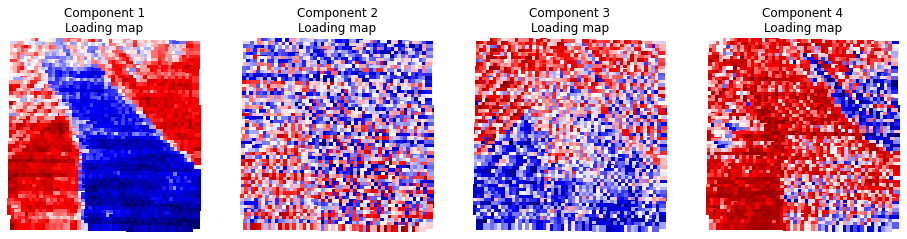

In [ ]:
ica_results = imstack.imblock_ica(4, plot_results=True)

Do NMF analysis and plot results:

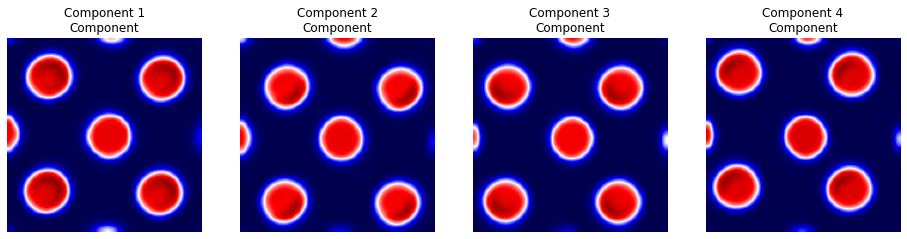

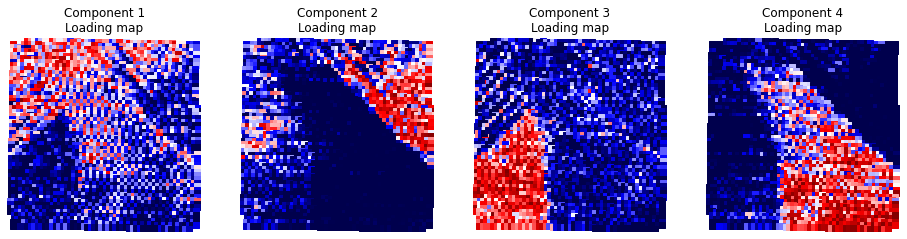

In [ ]:
nmf_results = imstack.imblock_nmf(4, plot_results=True)